In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

X = df.drop('Class', axis=1)
y = df['Class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}


grid_nn = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), param_grid_nn, n_jobs=-1, cv=3)
grid_nn.fit(X_train, y_train)

print("Best parameters for Neural Network: ", grid_nn.best_params_)

y_pred_nn = grid_nn.predict(X_test)
nn_report = classification_report(y_test, y_pred_nn, output_dict=True)
print("Neural Network:")
print(classification_report(y_test, y_pred_nn))
print("Accuracy:", accuracy_score(y_test, y_pred_nn))

Best parameters for Neural Network:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Network:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       261
           1       1.00      1.00      1.00       117
           2       0.95      0.95      0.95       317
           3       0.92      0.93      0.92       671
           4       0.97      0.95      0.96       408
           5       0.98      0.95      0.96       413
           6       0.88      0.90      0.89       536

    accuracy                           0.94      2723
   macro avg       0.95      0.95      0.95      2723
weighted avg       0.94      0.94      0.94      2723

Accuracy: 0.9360998898273962


In [5]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

X = df.drop('Class', axis=1)
y = df['Class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, n_jobs=-1, cv=3)
grid_svm.fit(X_train, y_train)

print("Best parameters for SVM: ", grid_svm.best_params_)
y_pred_svm = grid_svm.predict(X_test)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
print("SVM:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Best parameters for SVM:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVM:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       261
           1       1.00      1.00      1.00       117
           2       0.95      0.94      0.94       317
           3       0.91      0.93      0.92       671
           4       0.97      0.95      0.96       408
           5       0.97      0.96      0.96       413
           6       0.88      0.89      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

Accuracy: 0.9327947117150202


In [6]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

X = df.drop('Class', axis=1)
y = df['Class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, n_jobs=-1, cv=3)
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest: ", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters for Random Forest:  {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       261
           1       1.00      1.00      1.00       117
           2       0.91      0.93      0.92       317
           3       0.90      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.96      0.93      0.95       413
           6       0.87      0.88      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

Accuracy: 0.9203084832904884


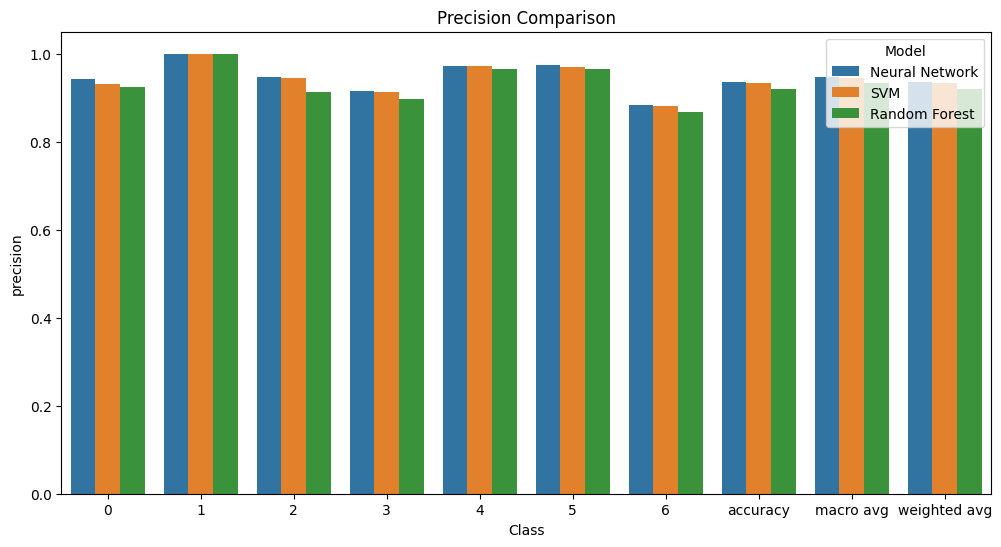

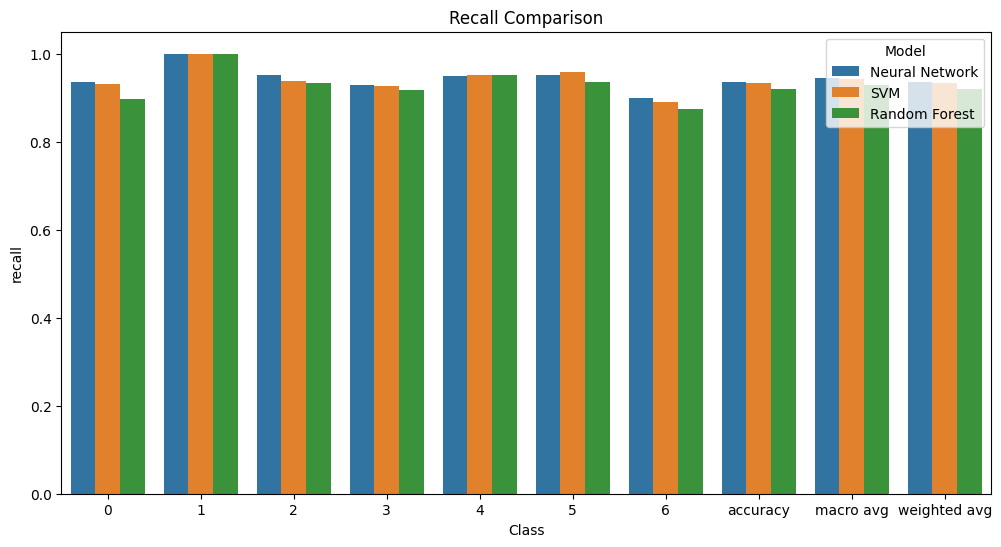

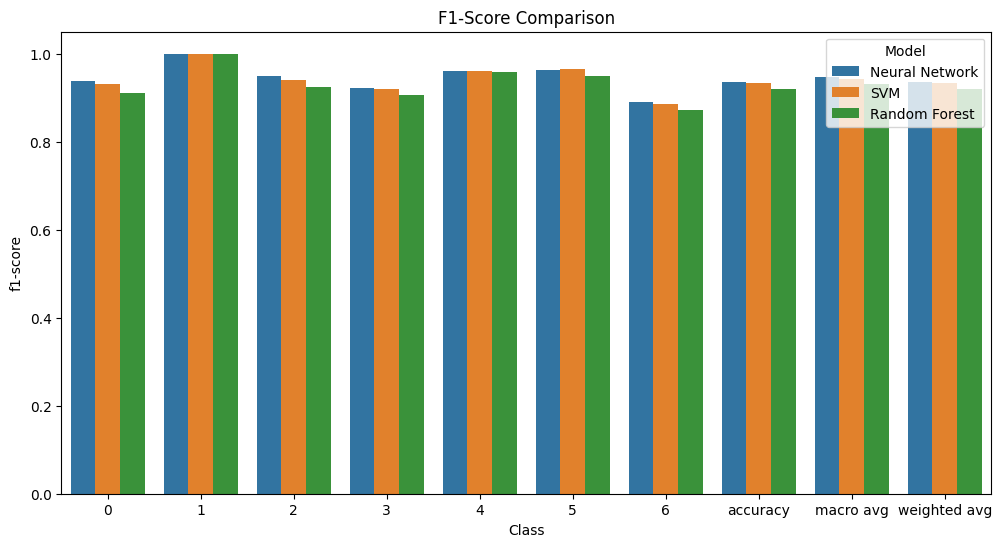

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='precision', hue='Model', data=results_df)
plt.title('Precision Comparison')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='recall', hue='Model', data=results_df)
plt.title('Recall Comparison')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='f1-score', hue='Model', data=results_df)
plt.title('F1-Score Comparison')
plt.show()

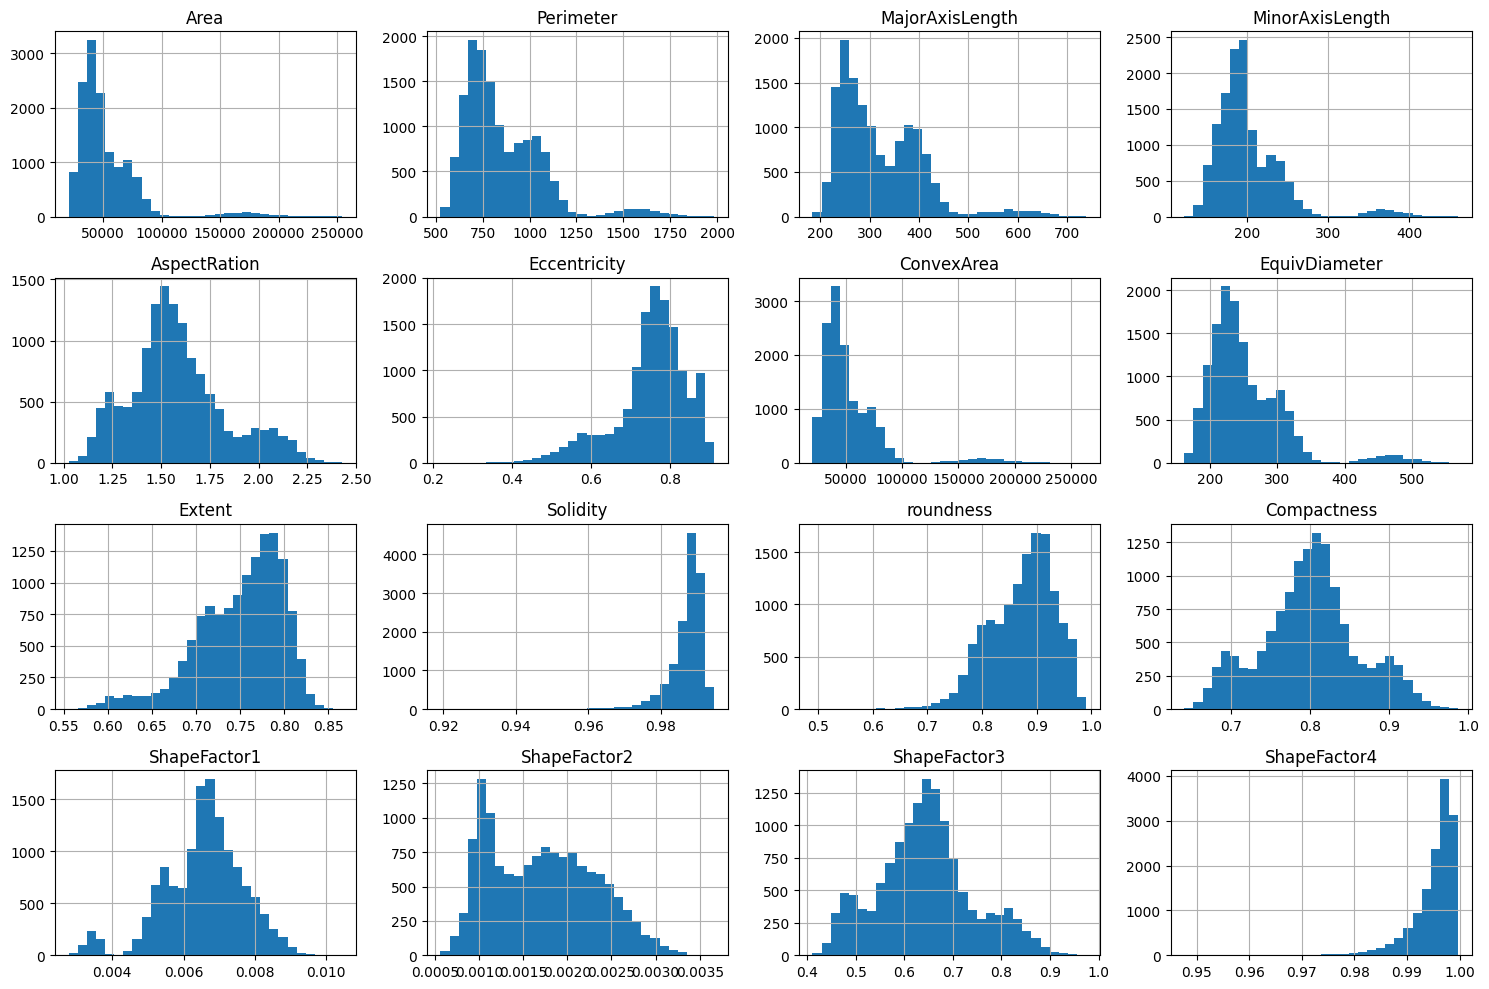

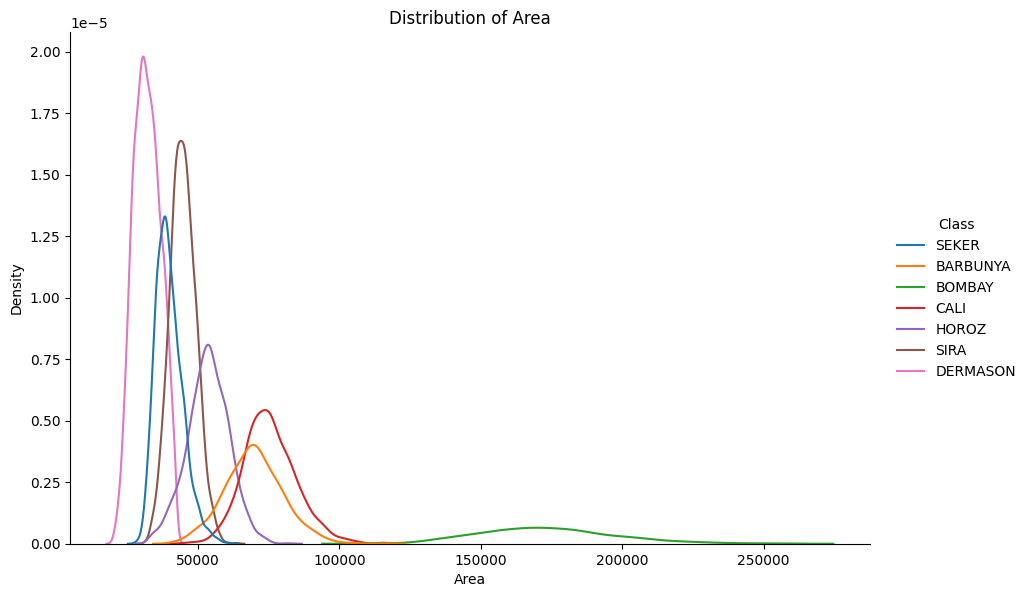

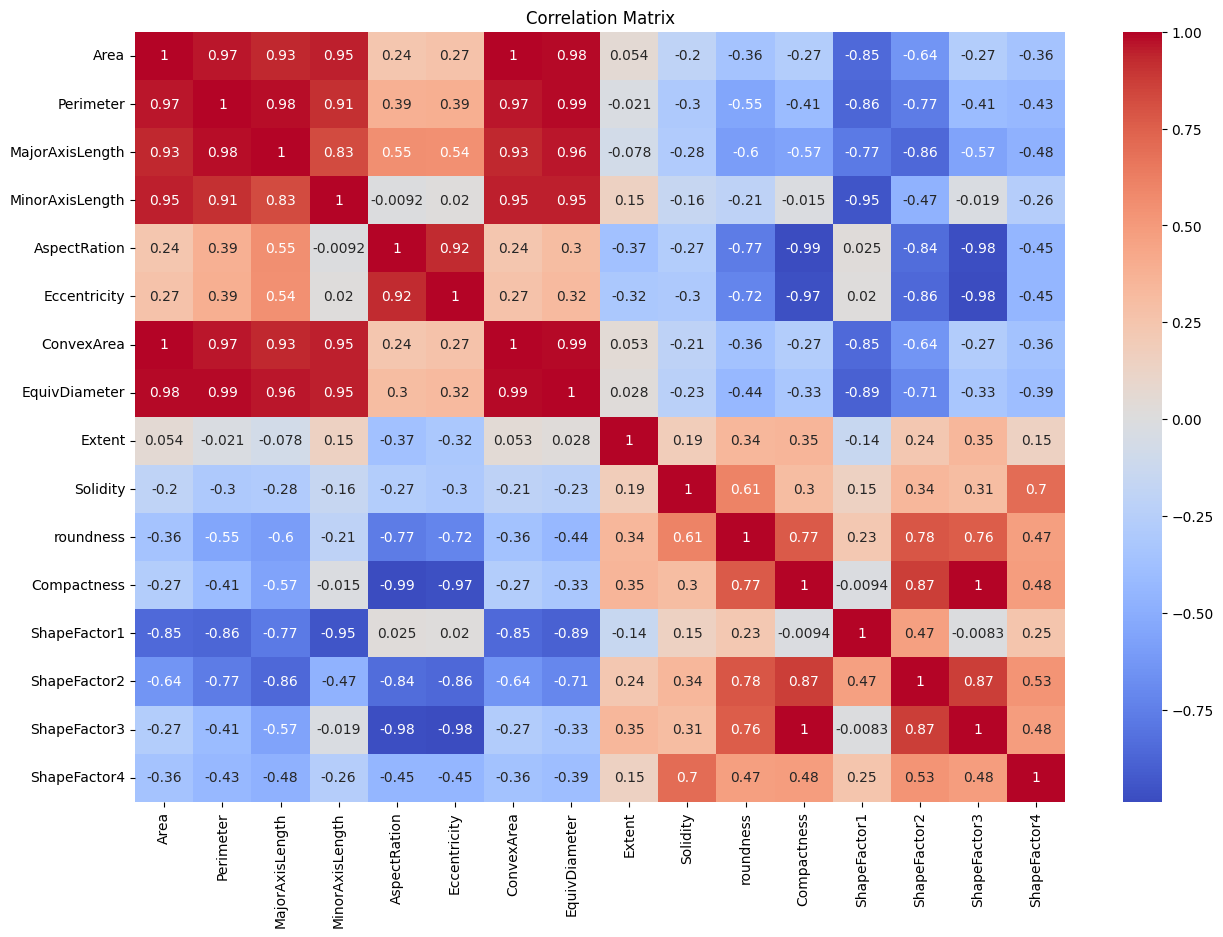

In [1]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

sns.displot(df, x='Area', hue='Class', kind='kde', height=6, aspect=1.5)
plt.title('Distribution of Area')
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(df.drop('Class', axis=1).corr(), annot=True, cmap='coolwarm') # Drop the 'Class' column
plt.title('Correlation Matrix')
plt.show()